# Glass Identification Project

**Project Description:**

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



The chemical compositions are measured as the weight percent in corresponding oxide

**Attribute Information:**

**The columns in this dataset are:**

1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)


**The Target label(Type of Glass) has 7 classes:**

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

* 1- building_windows_float_processed
* 2- building_windows_non_float_processed
* 3- vehicle_windows_float_processed
* 4- vehicle_windows_non_float_processed (none in this database)
* 5- containers
* 6- tableware
* 7- headlamps


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [4]:
df=pd.read_csv('glass_prediction.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Here we downloaded the entire dataset on my local computer from •	https://github.com/dsrscientist/dataset3/main/glass.csv and then imported to jupiter notebook

The dataset includes 214 rows x 11 columns.

**Adding meaningful column/attribute names:**

In [5]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.columns = names

In [6]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Exploring Dataset


* Shape of dataset

* Count of Null values

* Uniques values

In [15]:
df.shape

(214, 11)

This dataset contains 214 rows and 11 columns. In which 10 columns are independent column(input) and 1 column(Type of glass) is dependent column(output) column.

In [16]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
df.tail()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


**Checking for null values:**

In [18]:
df.isnull().sum()

Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

**Checking for null values by using Graphical Representation:**

<AxesSubplot:>

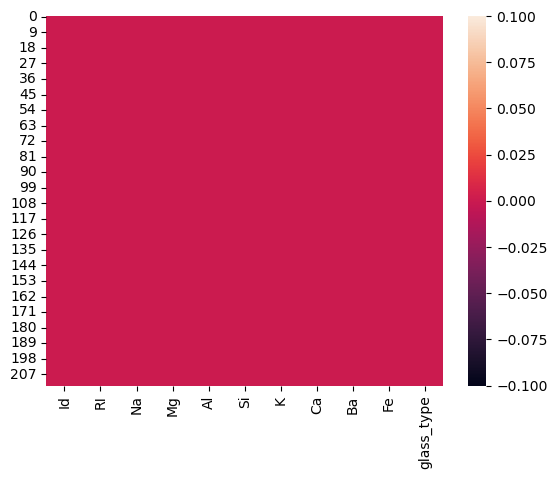

In [19]:
sns.heatmap(df.isnull())

As we can see here there is no blank space on the heatmap so no null values are present in the data set.

In [20]:
df.nunique()

Id            214
RI            178
Na            142
Mg             94
Al            118
Si            133
K              65
Ca            143
Ba             34
Fe             32
glass_type      6
dtype: int64

# Exploratory Data Analysis(EDA)

In [22]:
df.columns.to_list()

['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glass_type']

Here we can see the names of all the columns

In [23]:
df.dtypes

Id              int64
RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
glass_type      int64
dtype: object

This dataset has two types of data present in there ['int64', 'float64']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  glass_type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


It is showing the memory used by this dataset, types of data present in the dataset, total number of rows

In [26]:
df.glass_type.nunique()

6

In [27]:
df.glass_type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [28]:
df.glass_type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

We can see here that in our target variable there are 6 types of glass present. Where 2nd type of glass which means window type glass present in high amount and 6th type of glass which means non- window glass is present very less.

**Droping unnessery data from dataset:**

In [30]:
df.drop('Id', axis=1, inplace=True)

In [32]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Here we eleminate the column 'Id', which is not necessary in our Data Analysis.

**DataSet Statistical Information:**

In [33]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


This will give a brief summary of all the numerical columns present in the dataset:

* The count for each column is 214 which shows that there is no null value present there.

* Outliers are present in columns 'Na_Sodium', 'Al_Aluminum','K_Potassium', 'Ca_Calcium', 'Ba_Barium', 'Fe_Iron' because there is a hugh difference in between 75th percentile and max. value.

* In column 'Mg_Magnesium' mean is less than median which means the data is skewed to the left.

* We can also notice the standard deviation(std.), max., min., 25% percentile, 50% percentile, 75% percentile values from this describe method.

# Data Visualization:

**Univarient Analysis:**

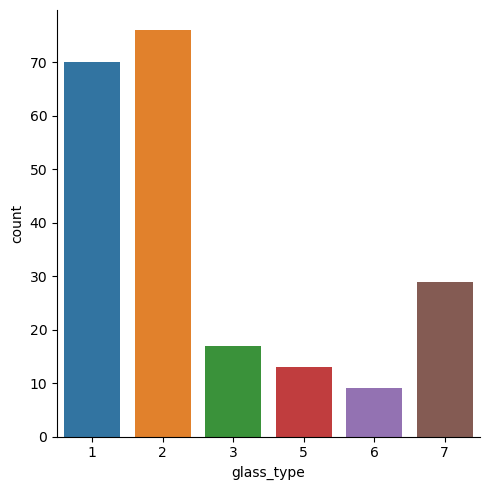

In [34]:
sns.catplot(x='glass_type', data=df, kind='count')

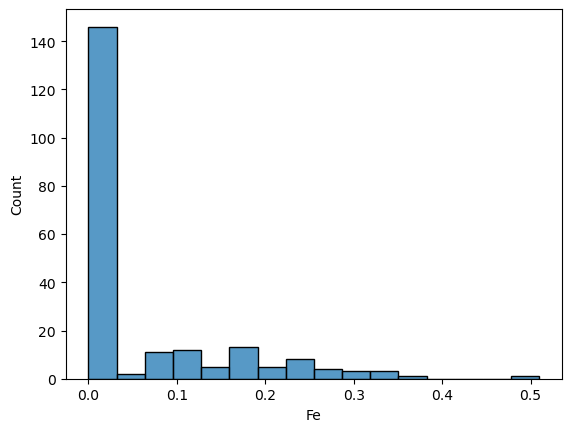

In [36]:
sns.histplot(df['Fe'])
plt.show()

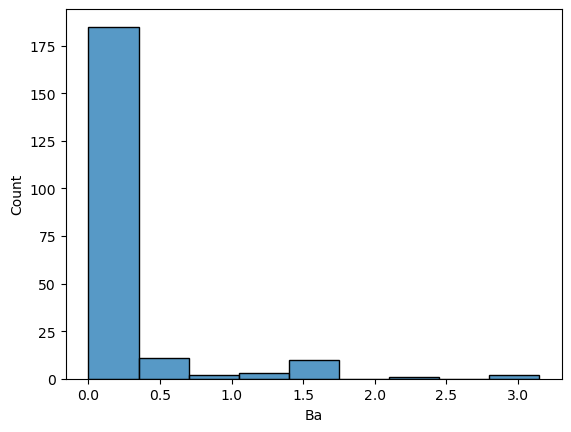

In [37]:
sns.histplot(df['Ba'])
plt.show()

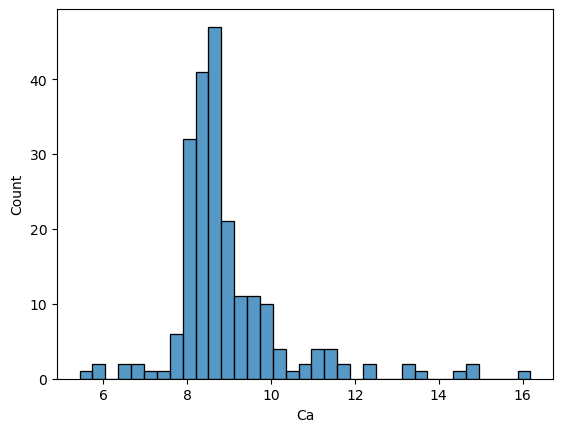

In [38]:
sns.histplot(df['Ca'])
plt.show()

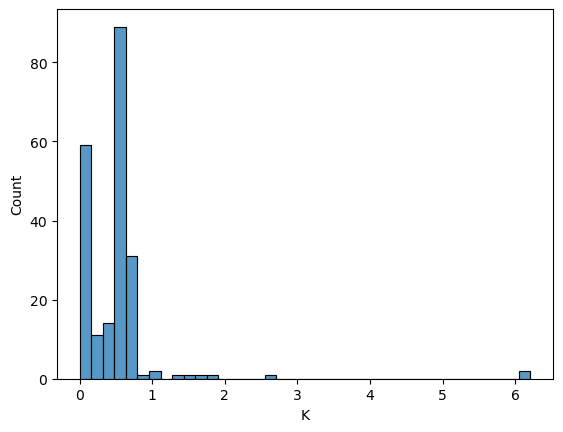

In [39]:
sns.histplot(df['K'])
plt.show()

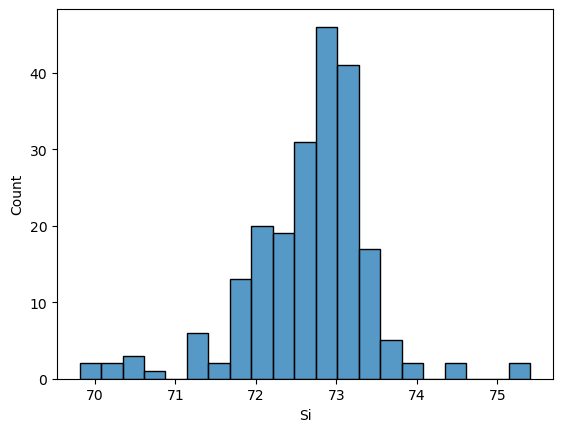

In [40]:
sns.histplot(df['Si'])
plt.show()

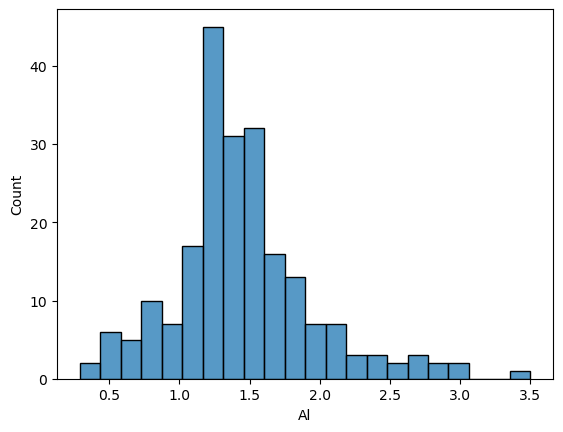

In [41]:
sns.histplot(df['Al'])
plt.show()

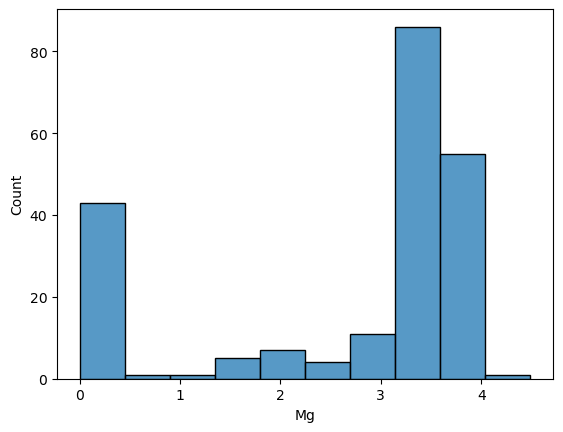

In [42]:
sns.histplot(df['Mg'])
plt.show()

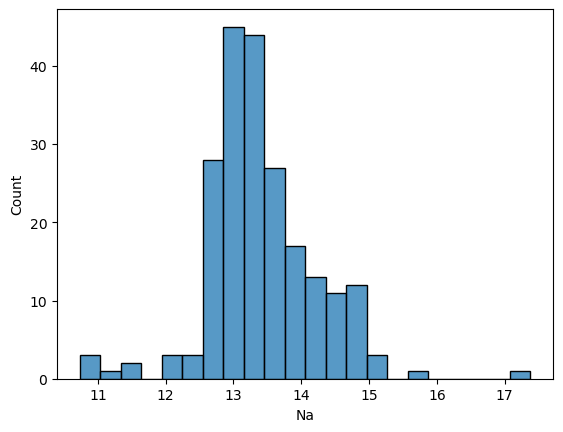

In [43]:
sns.histplot(df['Na'])
plt.show()

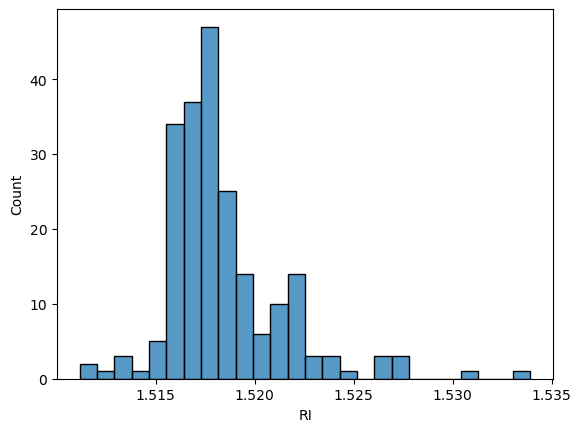

In [44]:
sns.histplot(df['RI'])
plt.show()

**Bivarient analysis:**

<AxesSubplot:xlabel='glass_type', ylabel='RI'>

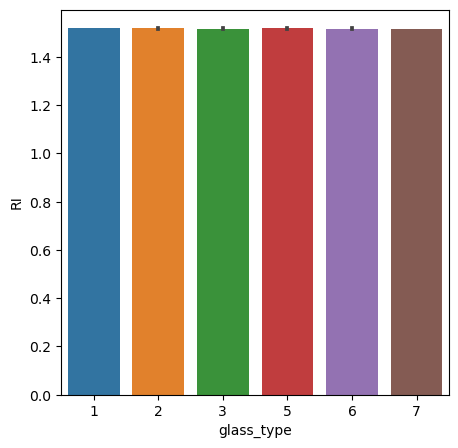

In [45]:
#glass_type vs RI_refractive_index
plot=plt.figure(figsize=(5,5))
sns.barplot(x='glass_type', y='RI', data=df)

<AxesSubplot:xlabel='glass_type', ylabel='Na'>

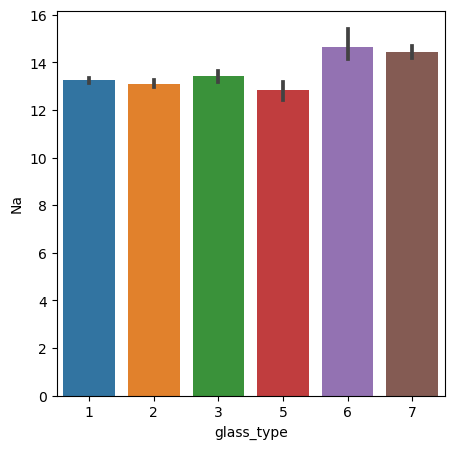

In [46]:
#Type_of_glass vs Na_Sodium
plot=plt.figure(figsize=(5,5))
sns.barplot(x='glass_type', y='Na', data=df)

<AxesSubplot:xlabel='glass_type', ylabel='Mg'>

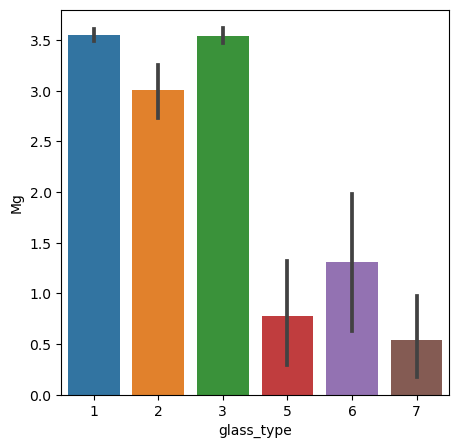

In [47]:
#Type_of_glass vs Mg_Magnesium
plot=plt.figure(figsize=(5,5))
sns.barplot(x='glass_type', y='Mg', data=df)

<AxesSubplot:xlabel='glass_type', ylabel='Al'>

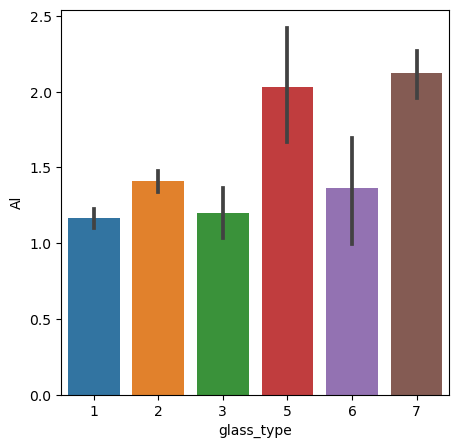

In [48]:
#Type_of_glass vs Al_Aluminum
plot=plt.figure(figsize=(5,5))
sns.barplot(x='glass_type', y='Al', data=df)

<AxesSubplot:xlabel='glass_type', ylabel='Si'>

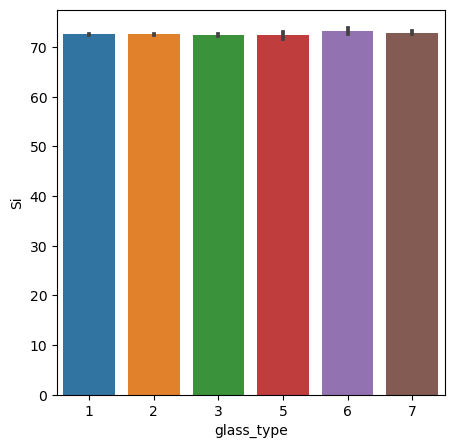

In [49]:
#Type_of_glass vs Si_Silicon
plot=plt.figure(figsize=(5,5))
sns.barplot(x='glass_type', y='Si', data=df)

<AxesSubplot:xlabel='glass_type', ylabel='K'>

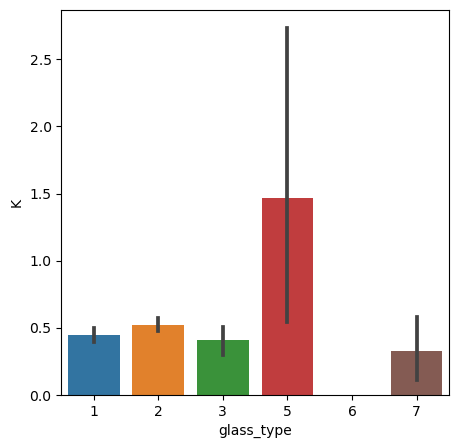

In [50]:
#Type_of_glass vs K_Potassium
plot=plt.figure(figsize=(5,5))
sns.barplot(x='glass_type', y='K', data=df)

<AxesSubplot:xlabel='glass_type', ylabel='Ca'>

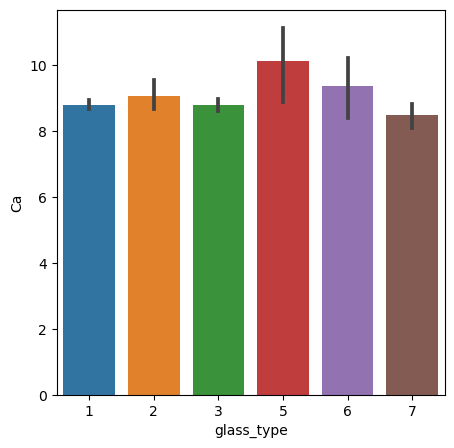

In [51]:
#Type_of_glass vs Ca_Calcium
plot=plt.figure(figsize=(5,5))
sns.barplot(x='glass_type', y='Ca', data=df)

<AxesSubplot:xlabel='glass_type', ylabel='Ba'>

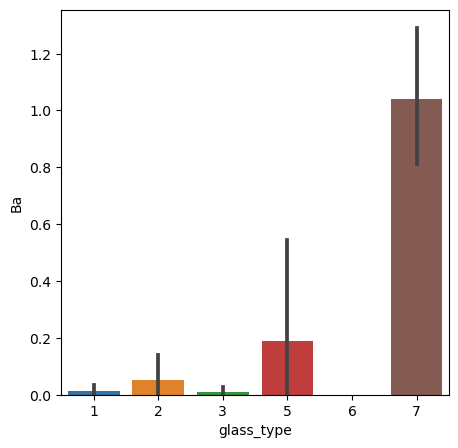

In [52]:
#Type_of_glass vs Ba_Barium
plot=plt.figure(figsize=(5,5))
sns.barplot(x='glass_type', y='Ba', data=df)

<AxesSubplot:xlabel='glass_type', ylabel='Fe'>

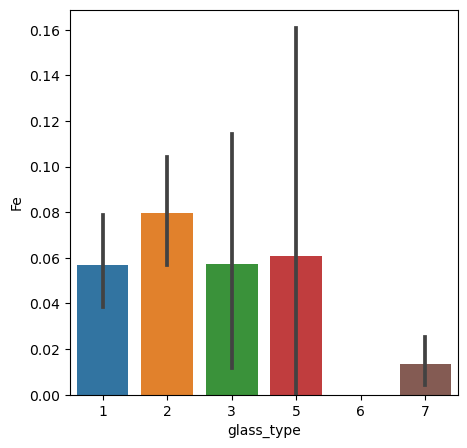

In [53]:
#Type_of_glass vs Fe_Iron
plot=plt.figure(figsize=(5,5))
sns.barplot(x='glass_type', y='Fe', data=df)

**Multivarient Analysis:**

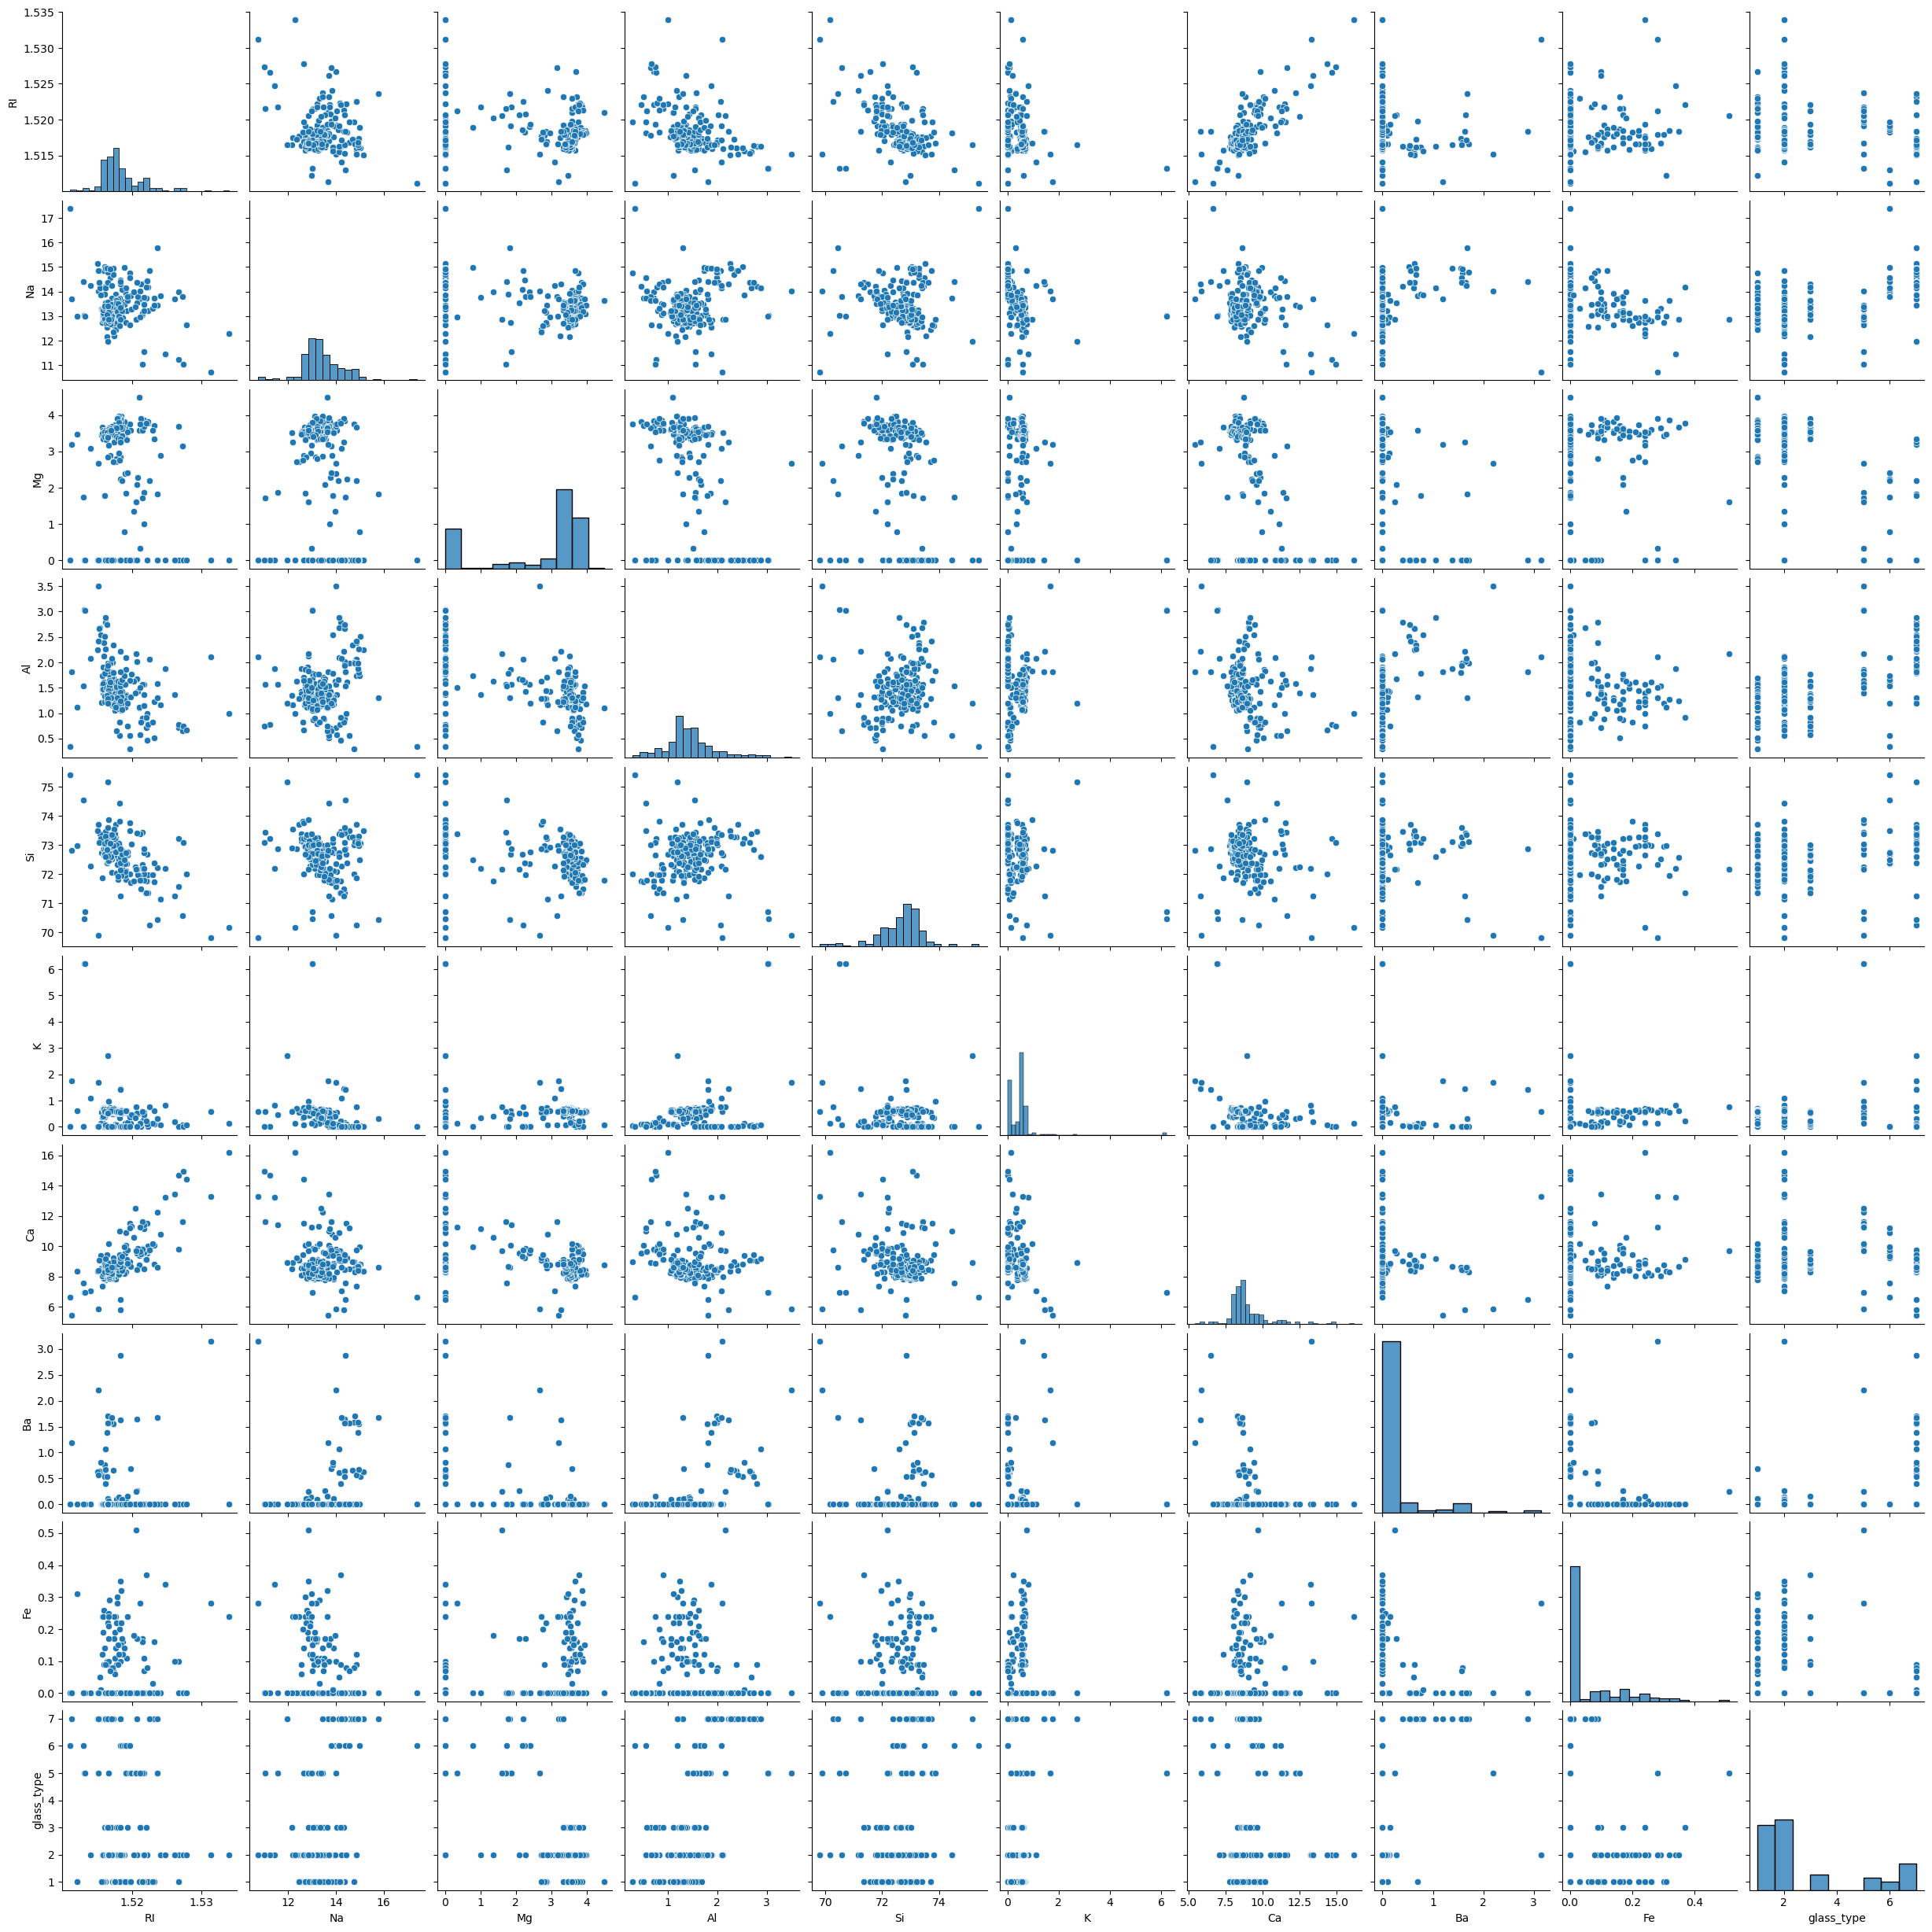

In [54]:
sns.pairplot(df)

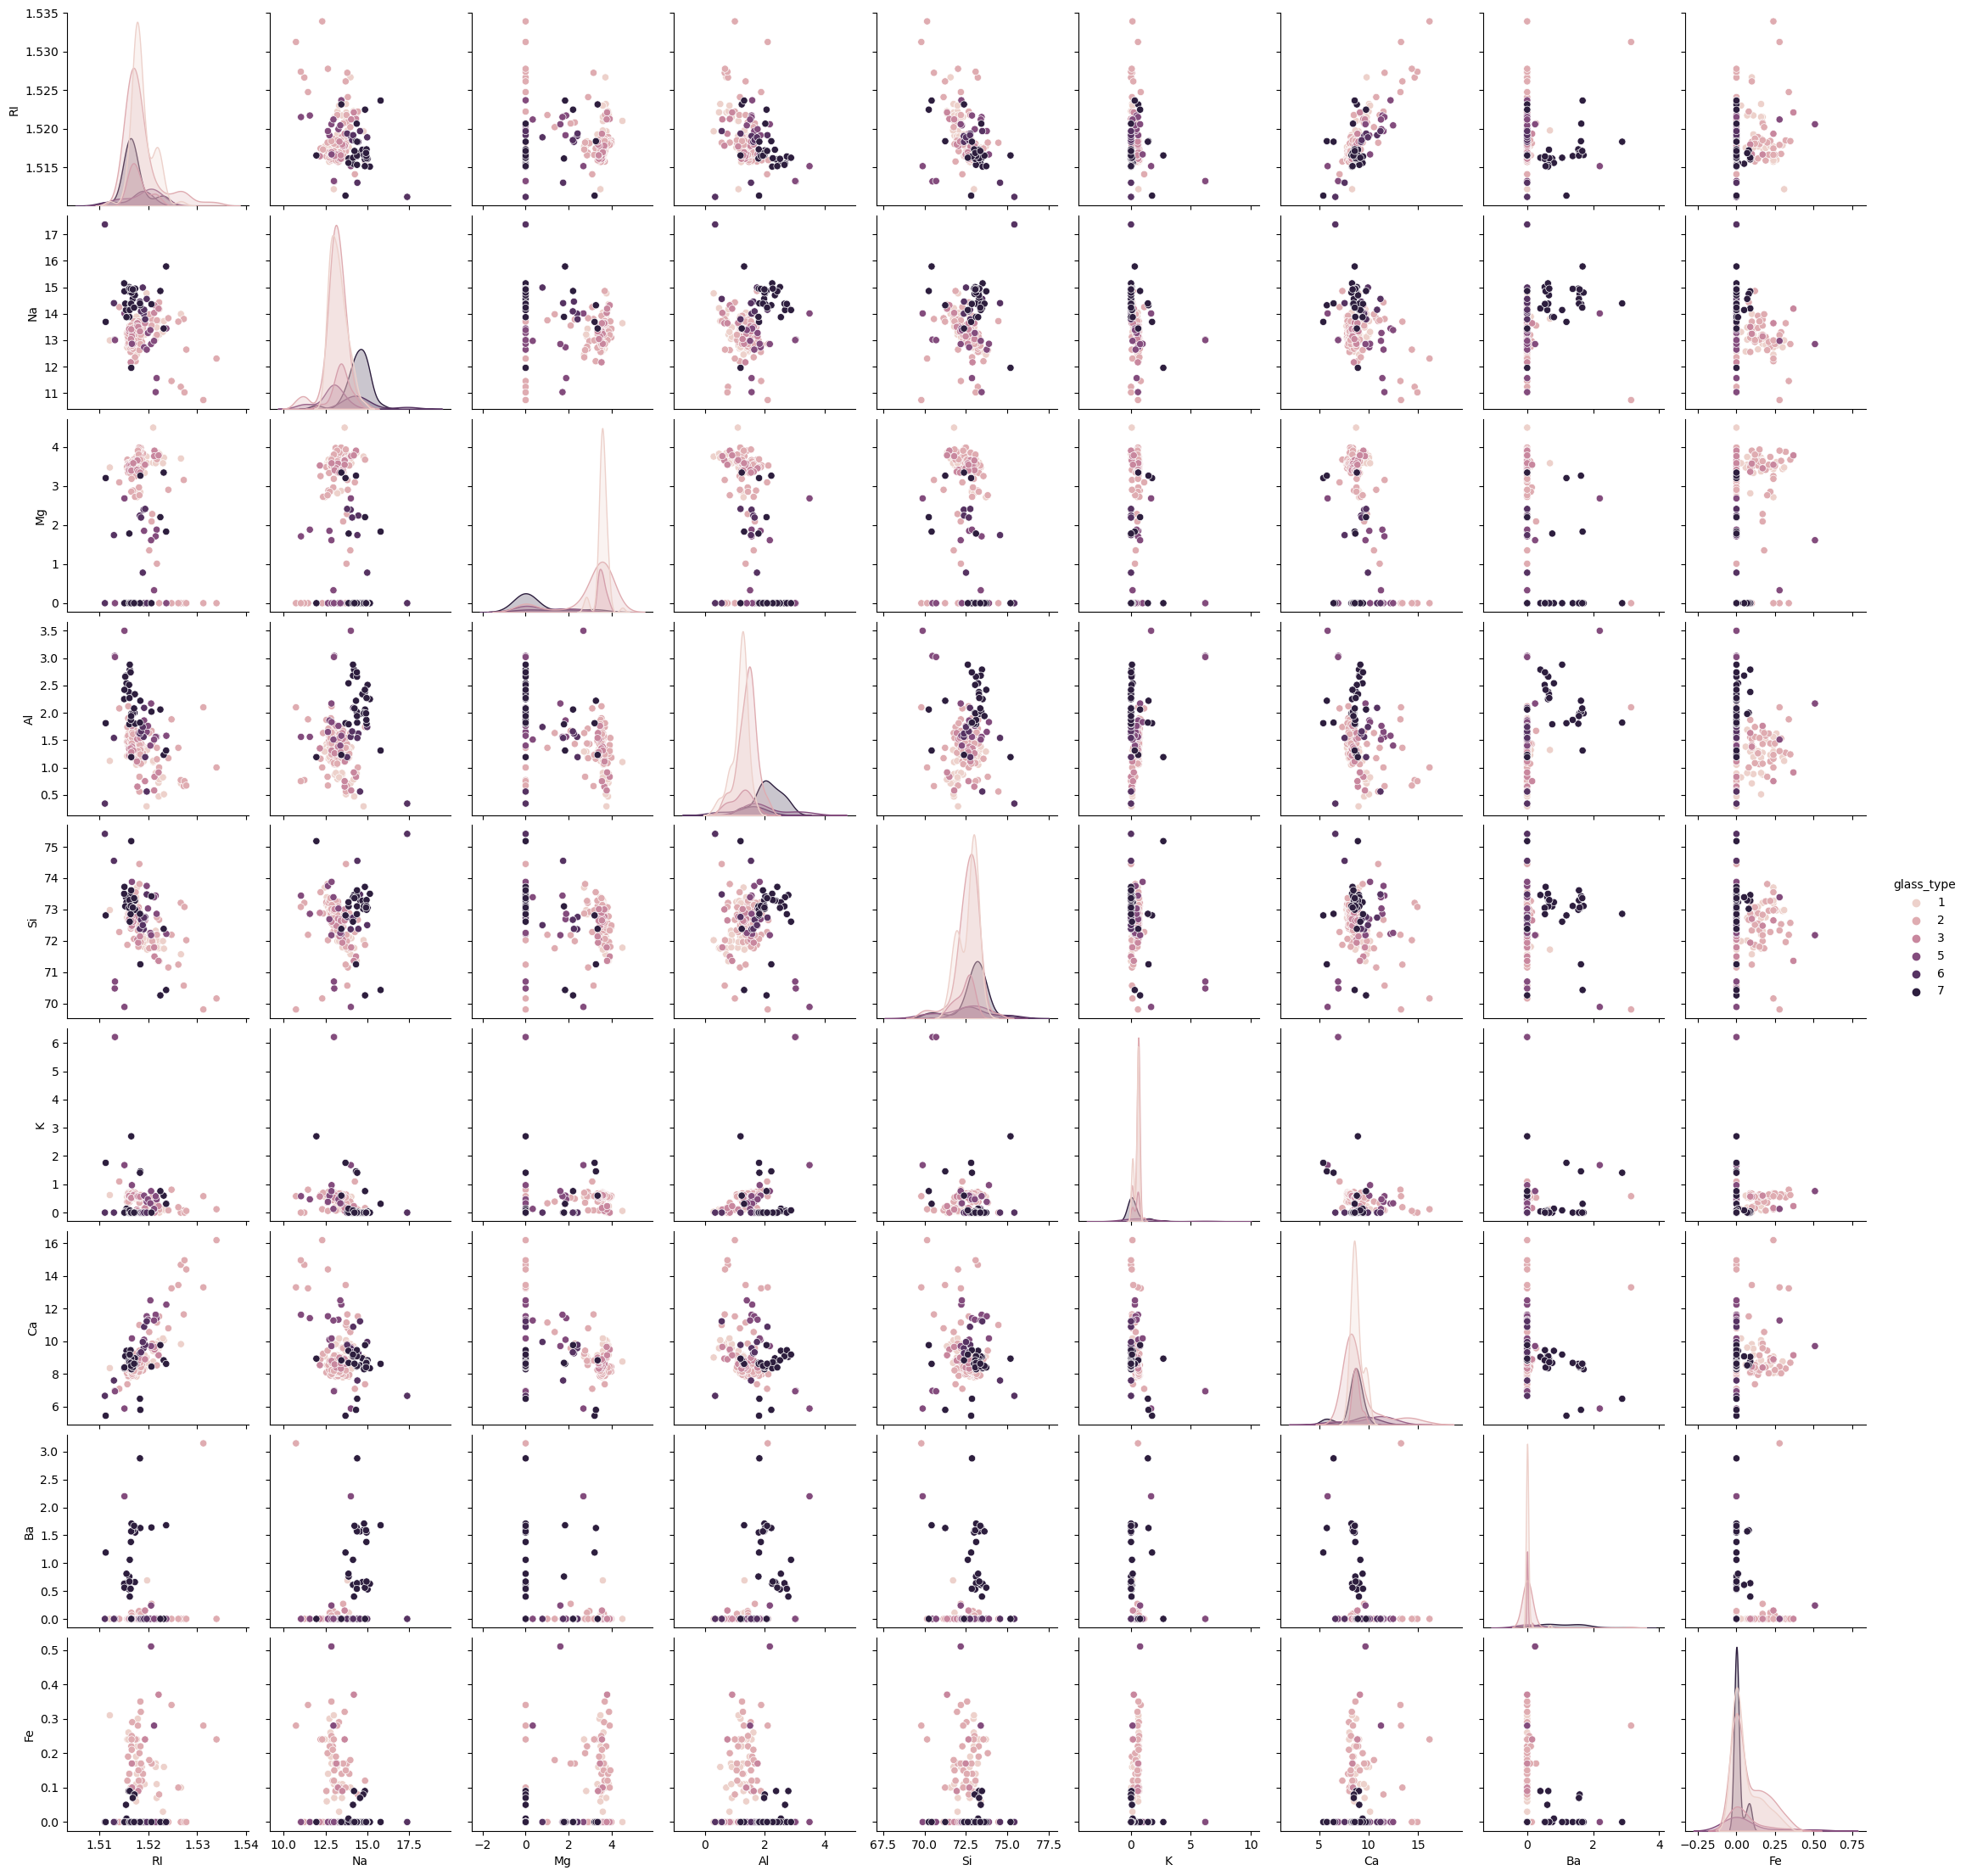

In [55]:
sns.pairplot(data=df, hue='glass_type')

**Correlation between target variable and independent variables**

In [57]:
cor=df.corr()
cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
glass_type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


**Corelation between variables by using Graphical Representation:**

<AxesSubplot:>

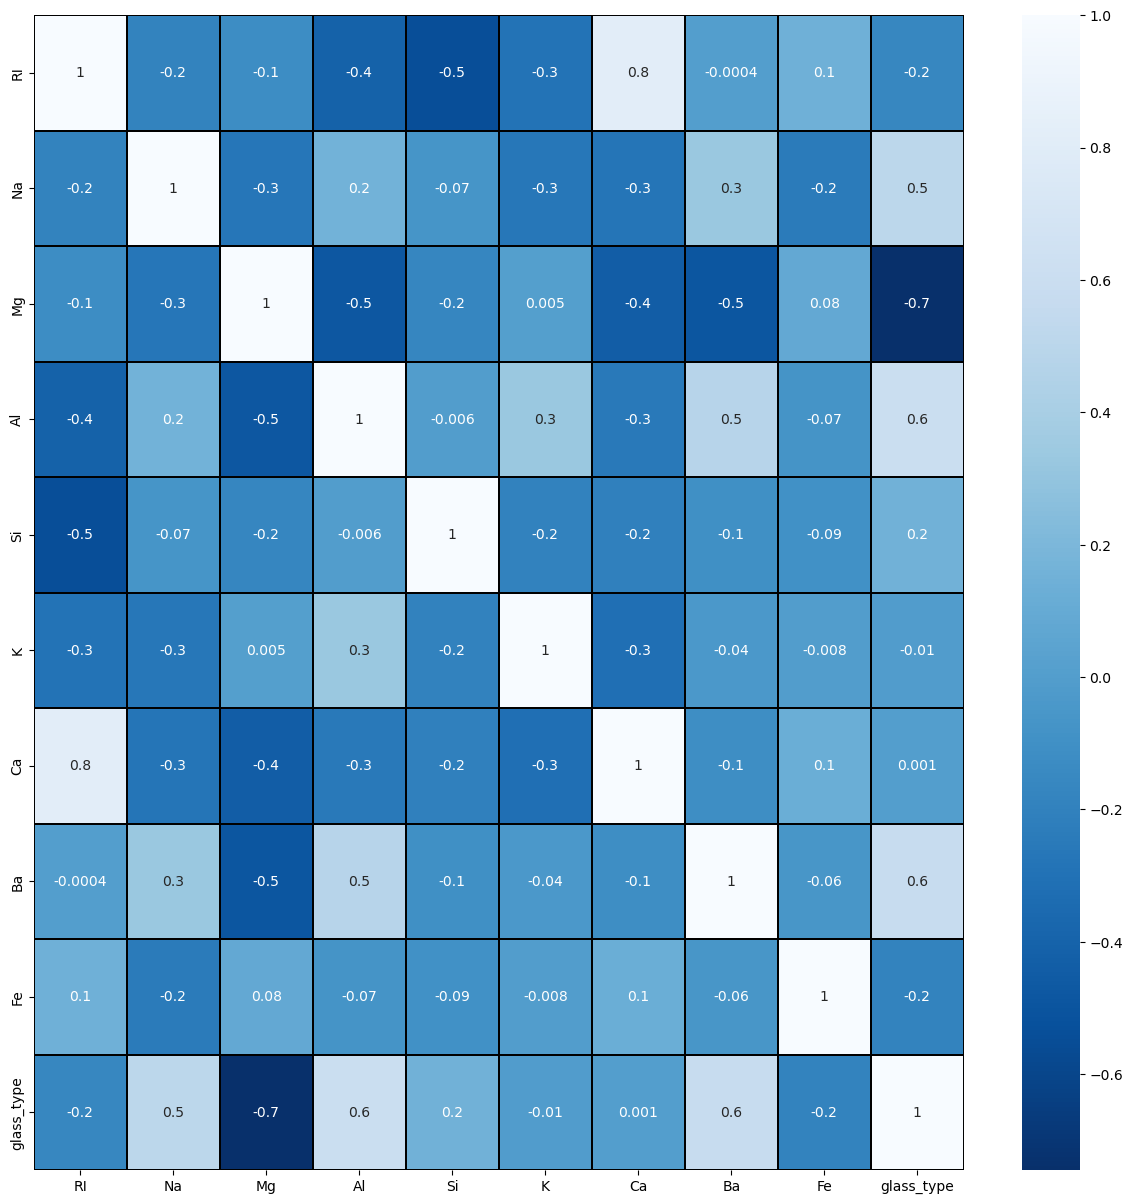

In [58]:
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, linewidths=0.1, fmt='.1g', linecolor='black', cmap='Blues_r')

**observations:**

* This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between input and target. This heatmap contains both positive and negative correlation.

* light shades are highly correlated.

* Ba is highly correlated with glass_type.

* Mg negatively correlated with glass.

In [59]:
cor['glass_type'].sort_values(ascending=False)

glass_type    1.000000
Al            0.598829
Ba            0.575161
Na            0.502898
Si            0.151565
Ca            0.000952
K            -0.010054
RI           -0.164237
Fe           -0.188278
Mg           -0.744993
Name: glass_type, dtype: float64

We can observe the positive and negative correlated features with the target.

**Visualizing the correlation between label and features using bar plot.**

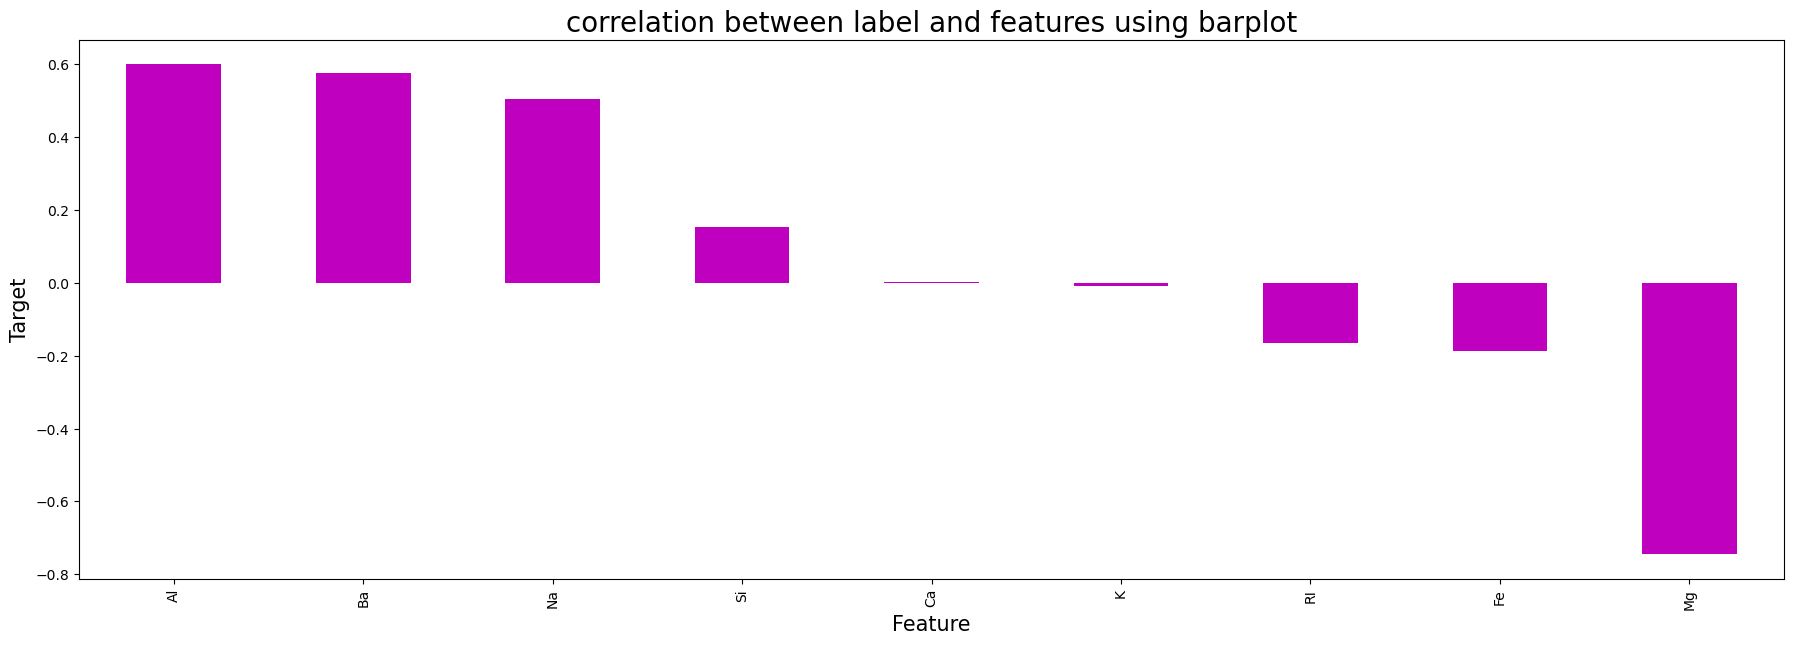

In [62]:
plt.figure(figsize=(22,7))
df.corr()['glass_type'].sort_values(ascending=False).drop(['glass_type']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("correlation between label and features using barplot",fontsize=20)
plt.show()

# Seprating Columns into features and label:

In [64]:
x=df.drop('glass_type', axis=1)
y=df['glass_type'].apply(lambda y_value: 1 if y_value>=5 else 0)


In [66]:
x.shape


(214, 9)

In [67]:
y.shape

(214,)

In [68]:
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [70]:
y

0      0
1      0
2      0
3      0
4      0
      ..
209    1
210    1
211    1
212    1
213    1
Name: glass_type, Length: 214, dtype: int64

# Feature Scalling Using Standard Scalarization

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


We have scaled the data using standard scalarization method to overcome the issue of biasness standard scaler will convert mean=0 and std=1

Now we check for the multicolinearity for this we use Variance Inflation factor(VIF) method

# Checking Variance Inflation factor(VIF)

In [72]:
#Finding varience inflation factor in each column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)
            for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,9.504579,RI
1,61.789643,Na
2,207.841338,Mg
3,25.682696,Al
4,58.176725,Si
5,43.620777,K
6,211.427466,Ca
7,26.135301,Ba
8,1.218039,Fe


In [73]:
y.value_counts()

0    163
1     51
Name: glass_type, dtype: int64

Here we can see that the data is not balanced since it is a classification problem we will balance the data using oversampling method

**Oversampling:**

In [74]:
#oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [75]:
#checking value count of target column
y.value_counts()

0    163
1    163
Name: glass_type, dtype: int64

Here we can see that the data is balanced and now we can use further machine learning model

# Modeling

**Finding the best random state:**

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccuracy=0
maxRandomState=0

for i in range(1,500):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
        
print('Best accuracy is', maxAccuracy, 'at random_state', maxRandomState)

Best accuracy is 1.0 at random_state 12


**Split the data into train, test, split:**

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=maxRandomState)
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
317,0.023510,1.001890,-0.331065,0.402725,-0.111328,-0.763919,0.240378,-0.352877,-0.586451
124,1.123713,-0.255127,0.691761,-0.592061,0.128201,0.066000,-0.307758,-0.352877,-0.586451
111,2.978645,-2.930981,-1.865511,-1.395110,0.555256,-0.763919,4.228014,-0.352877,-0.586451
221,-0.491419,1.346889,-1.865511,1.107633,0.842075,-0.763919,-0.296052,2.845593,0.013951
53,0.001511,-0.328775,0.108036,-0.331070,0.257612,0.081369,0.079614,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
259,-0.389580,1.511086,-1.773376,1.714763,0.796727,-0.763919,-0.019593,0.992633,-0.586451
130,1.123713,0.419973,-1.163651,-0.170460,-0.596498,-0.256746,1.537540,-0.352877,-0.586451
241,-0.495656,1.857170,-1.865511,1.083220,0.526733,-0.763919,-0.387963,2.850054,-0.586451
253,-1.066911,1.813534,-1.865511,1.917432,1.349961,-0.763919,-0.403465,0.792643,-0.586451


In [78]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
293,-0.754419,1.937707,-1.865511,2.099951,0.560173,-0.698367,-0.096667,0.748138,-0.450397
188,1.354754,1.782449,-0.336707,1.234875,-3.094124,0.404115,0.565589,-0.352877,-0.586451
41,-0.269137,-0.856581,0.511084,-0.491680,0.710549,0.142844,-0.223241,-0.352877,-0.586451
52,-0.094206,0.027188,0.128883,-0.511756,0.244671,0.081369,0.051441,-0.352877,-0.586451
207,-0.018292,1.205545,-1.865511,0.753046,0.270553,1.403091,-1.751599,5.452917,-0.586451
...,...,...,...,...,...,...,...,...,...
117,-0.424265,0.383150,0.691761,0.732970,-0.764732,0.219689,-0.758518,-0.352877,-0.586451
275,0.314670,2.243801,-1.403814,0.598701,-0.706294,-0.590945,-0.338577,2.918275,-0.586451
88,-0.721318,-0.488344,0.566677,0.070454,0.309376,0.158213,-0.589483,-0.352877,-0.586451
244,0.644125,-0.280255,-1.796354,0.481228,0.631047,-0.199166,1.653697,-0.352877,0.282179


In [79]:
y_train

317    1
124    0
111    0
221    1
53     0
      ..
259    1
130    0
241    1
253    1
155    0
Name: glass_type, Length: 228, dtype: int64

In [80]:
y_test

293    1
188    1
41     0
52     0
207    1
      ..
117    0
275    1
88     0
244    1
167    1
Name: glass_type, Length: 98, dtype: int64

**Importing various classification libraries:**

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier,RandomForestClassifier
from sklearn.linear_model import Lasso,Ridge

# DecisionTree Classifier

In [82]:
#checking accuracy for DecisionTreeclassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train, y_train)
predDTC=DTC.predict(x_test)
print('Accuracy Score',accuracy_score(y_test, predDTC))
print('Confusion Matrix',confusion_matrix(y_test, predDTC))
print('Classification Report',classification_report(y_test,predDTC))

Accuracy Score 0.9897959183673469
Confusion Matrix [[47  1]
 [ 0 50]]
Classification Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        50

    accuracy                           0.99        98
   macro avg       0.99      0.99      0.99        98
weighted avg       0.99      0.99      0.99        98



# Support Vector Classifier

In [83]:
#checking accuracy for support vector machine classifier

svc=SVC()
svc.fit(x_train,y_train)
predsvc= svc.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predsvc))
print('Confusion Matrix', confusion_matrix(y_test,predsvc))
print('Classification Report', classification_report(y_test,predsvc))

Accuracy Score 0.9897959183673469
Confusion Matrix [[47  1]
 [ 0 50]]
Classification Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        50

    accuracy                           0.99        98
   macro avg       0.99      0.99      0.99        98
weighted avg       0.99      0.99      0.99        98



# K-Neighbors Classifier

In [84]:
#checking accuracy for support k-Neighbors classifier

KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN= KNN.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predKNN))
print('Confusion Matrix', confusion_matrix(y_test,predKNN))
print('Classification Report', classification_report(y_test,predKNN))

Accuracy Score 0.9795918367346939
Confusion Matrix [[48  0]
 [ 2 48]]
Classification Report               precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.96      0.98        50

    accuracy                           0.98        98
   macro avg       0.98      0.98      0.98        98
weighted avg       0.98      0.98      0.98        98



# Random Forest Classifier

In [85]:
#checking accuracy for randomforestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC=RFC.predict(x_test)
print('Accuracy Score', accuracy_score(y_test, predRFC))
print('Confusion Matrix', confusion_matrix(y_test, predRFC))
print('Classification Report', classification_report(y_test,predRFC))

Accuracy Score 1.0
Confusion Matrix [[48  0]
 [ 0 50]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        50

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



# Gradient Boosting Classifier

In [86]:
#checking accuracy for gradient boosting classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predGB))
print('Confusion Matrix', confusion_matrix(y_test,predGB))
print('Classification Report', classification_report(y_test,predGB))

Accuracy Score 0.9897959183673469
Confusion Matrix [[47  1]
 [ 0 50]]
Classification Report               precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        50

    accuracy                           0.99        98
   macro avg       0.99      0.99      0.99        98
weighted avg       0.99      0.99      0.99        98



# AdaBoost Classifier

In [87]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC=ABC.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predABC))
print('Confusion Matrix', confusion_matrix(y_test,predABC))
print('Classification Report', classification_report(y_test,predABC))

Accuracy Score 0.9693877551020408
Confusion Matrix [[47  1]
 [ 2 48]]
Classification Report               precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.98      0.96      0.97        50

    accuracy                           0.97        98
   macro avg       0.97      0.97      0.97        98
weighted avg       0.97      0.97      0.97        98



# Bagging Classifier

In [88]:
#checking accuracy for Bagging classifier

BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC= BC.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predBC))
print('Confusion Matrix', confusion_matrix(y_test,predBC))
print('Classification Report', classification_report(y_test,predBC))

Accuracy Score 0.9795918367346939
Confusion Matrix [[48  0]
 [ 2 48]]
Classification Report               precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.96      0.98        50

    accuracy                           0.98        98
   macro avg       0.98      0.98      0.98        98
weighted avg       0.98      0.98      0.98        98



# ExtraTreeClassifier

In [89]:
#checking accuracy for ExtraTreeClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predET))
print('Confusion Matrix', confusion_matrix(y_test,predET))
print('Classification Report', classification_report(y_test,predET))

Accuracy Score 1.0
Confusion Matrix [[48  0]
 [ 0 50]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        50

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



# Cross Validation Score

In [90]:
#using k-fold cross validation for decision tree classifier 
cvscore=cross_val_score(DTC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predDTC) - cvscore.mean())

[0.93939394 0.95384615 0.96923077 0.87692308 0.98461538]
0.944801864801865
Difference between Accuracy score and cross validation score is - 0.04499405356548192


In [91]:
#using k-fold cross validation for support vector classifier
cvscore=cross_val_score(svc,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predsvc) - cvscore.mean())

[0.96969697 1.         1.         0.83076923 1.        ]
0.96009324009324
Difference between Accuracy score and cross validation score is - 0.029702678274106886


In [92]:
#Using k-fold cross validation for K-Neighbour Classifier

cvscore=cross_val_score(KNN,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predKNN) - cvscore.mean())

[0.95454545 0.98461538 1.         0.84615385 0.98461538]
0.953986013986014
Difference between Accuracy score and cross validation score is - 0.02560582274867984


In [93]:
#Using k-fold cross validation for Random Forest Classifier

cvscore=cross_val_score(RFC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predRFC) - cvscore.mean())

[0.96969697 1.         0.98461538 0.81538462 1.        ]
0.9539393939393939
Difference between Accuracy score and cross validation score is - 0.046060606060606135


In [94]:
#using k-fold cross validation for gradient boosting classifier
cvscore=cross_val_score(GB,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predGB) - cvscore.mean())

[0.96969697 0.98461538 0.98461538 0.86153846 1.        ]
0.96009324009324
Difference between Accuracy score and cross validation score is - 0.029702678274106886


In [95]:
#using k-fold cross validation for Adaboosting classifier
cvscore=cross_val_score(ABC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predABC) - cvscore.mean())

[0.90909091 0.98461538 0.93846154 0.83076923 0.98461538]
0.9295104895104895
Difference between Accuracy score and cross validation score is - 0.03987726559155125


In [96]:
#using k-fold cross validation for Bagging classifier
cvscore=cross_val_score(BC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predBC) - cvscore.mean())

[0.93939394 0.98461538 1.         0.89230769 0.98461538]
0.9601864801864803
Difference between Accuracy score and cross validation score is - 0.019405356548213515


In [97]:
#using k-fold cross validation for ExtraTrees classifier
cvscore=cross_val_score(ET,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predET) - cvscore.mean())

[0.95454545 1.         0.98461538 0.81538462 1.        ]
0.9509090909090909
Difference between Accuracy score and cross validation score is - 0.049090909090909074


# Hyper parameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion': ['gini','entropy'],
            'random_state': [10,50,1000],
            'max_depth': [0,10,20],
            'n_jobs': [-2,-1,1],
            'n_estimators': [50,100,200,300]}

In [99]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [100]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [101]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [102]:
Final_model=ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=50, n_jobs=-2, random_state=50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

98.9795918367347


**Plotting ROC and compare AUC for all the models used:**

In [103]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

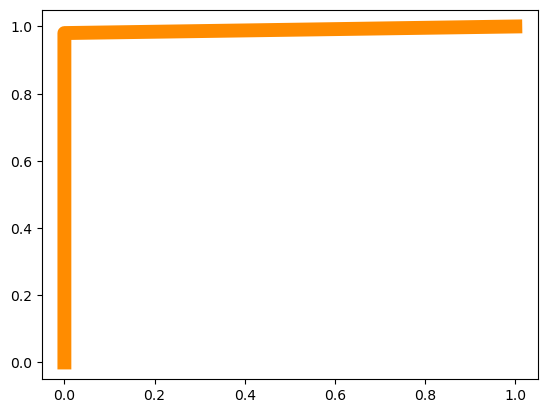

In [104]:
from sklearn.metrics import auc
fpr,tpr,threshold= roc_curve(pred,y_test)

roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange', lw=10, label='ROC curve(area=%0.2f)' %roc_auc)

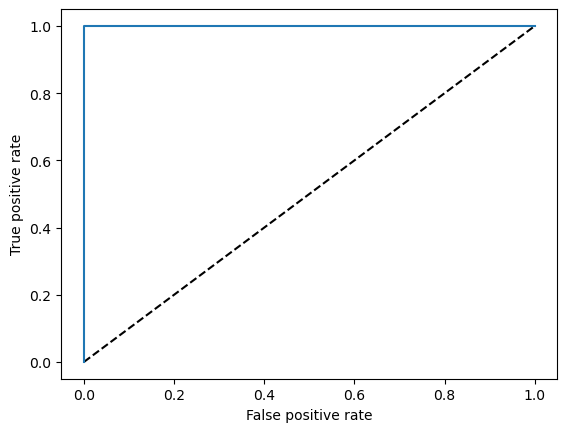

Auc score:
 0.9895833333333333


In [105]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label= 'Random Forest Classifier(area=%0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score=roc_auc_score(y_test, Final_model.predict(x_test))
print('Auc score:' '\n', auc_score)

Here we can see area under curve for each model used

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 98.95%

# Saving the model

In [106]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model, "glass_identification.pkl")

['glass_identification.pkl']

# predicting the save model

In [107]:
#Lets Load the saved model and get the prediction
model=joblib.load("glass_identification.pkl")

#prediction
prediction=model.predict(x_test)
prediction

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [108]:
a=np.array(y_test)
df=pd.DataFrame()
df["predicted"]=prediction
df['original']=a
df

,predicted,original
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
93,0,0
94,1,1
95,0,0
96,1,1


# END of the Project